In [6]:

import pandas as pd
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
df = pd.concat([data.data, data.target.rename("target")], axis=1)

# Display the first 5 rows
df.head()
print("Dataset Info:")

Dataset Info:


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [8]:
print("\nDataset Statistics:")
display(df.describe()) 


Dataset Statistics:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [10]:
!pip install seaborn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


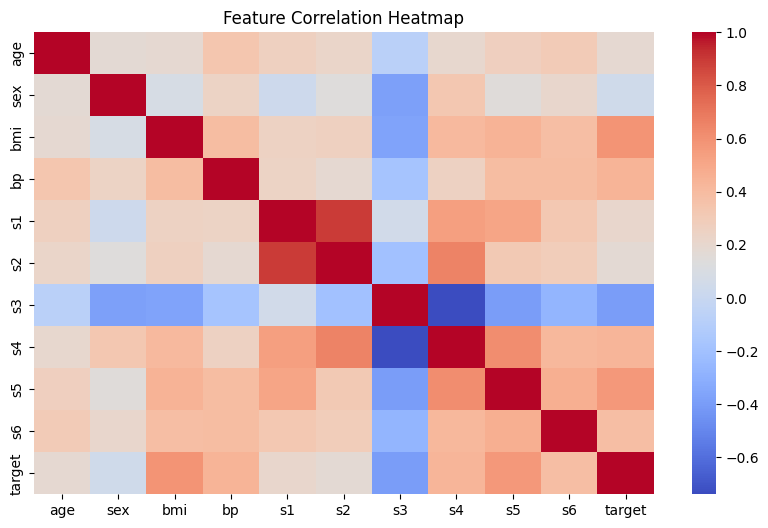

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X = df.drop("target", axis=1)
y = df["target"]

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Data preprocessing complete.
Training set shape: (353, 10)
Test set shape: (89, 10)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [22]:
baseline_model = RandomForestRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
baseline_preds = baseline_model.predict(X_test)

In [24]:
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))
baseline_r2 = r2_score(y_test, baseline_preds)

In [25]:
print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Baseline R²: {baseline_r2:.2f}")

Baseline RMSE: 54.43
Baseline R²: 0.44


In [38]:
# Step 6: Hyperparameter tuning with Optuna
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )
    
    score = cross_val_score(
        model, X_train, y_train,
        cv=3,
        scoring="neg_root_mean_squared_error"
    )
    return -score.mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Best hyperparameters:", study.best_params)


[I 2025-07-29 14:35:27,235] A new study created in memory with name: no-name-3116de5d-c500-4e7d-8f9b-caa750b53693
[I 2025-07-29 14:35:29,694] Trial 0 finished with value: 58.59568425646523 and parameters: {'n_estimators': 267, 'max_depth': 8}. Best is trial 0 with value: 58.59568425646523.
[I 2025-07-29 14:35:32,364] Trial 1 finished with value: 58.810999964779406 and parameters: {'n_estimators': 263, 'max_depth': 14}. Best is trial 0 with value: 58.59568425646523.
[I 2025-07-29 14:35:34,279] Trial 2 finished with value: 58.523783330993155 and parameters: {'n_estimators': 249, 'max_depth': 5}. Best is trial 2 with value: 58.523783330993155.
[I 2025-07-29 14:35:34,842] Trial 3 finished with value: 59.475710370850976 and parameters: {'n_estimators': 59, 'max_depth': 9}. Best is trial 2 with value: 58.523783330993155.
[I 2025-07-29 14:35:35,579] Trial 4 finished with value: 59.652113763095706 and parameters: {'n_estimators': 71, 'max_depth': 19}. Best is trial 2 with value: 58.52378333099

Best hyperparameters: {'n_estimators': 249, 'max_depth': 5}


In [39]:
best_params = study.best_params

In [40]:
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

,n_estimators,249
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
final_preds = final_model.predict(X_test)

In [42]:
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
final_r2 = r2_score(y_test, final_preds)

print("Final Model Performance:")
print(f"RMSE: {final_rmse:.2f}")
print(f"R²: {final_r2:.2f}")

Final Model Performance:
RMSE: 53.67
R²: 0.46


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
importances = final_model.feature_importances_
features = df.drop("target", axis=1).columns

In [45]:
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

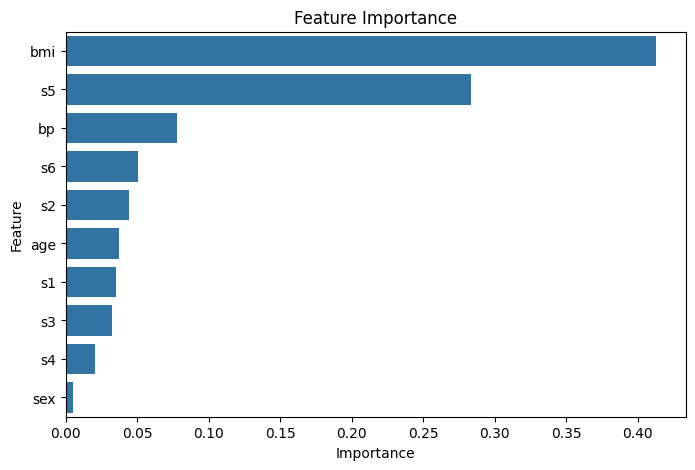

,Feature,Importance
2,bmi,0.412740
8,s5,0.283771
3,bp,0.077669
9,s6,0.050737
5,s2,0.044465
0,age,0.037301
4,s1,0.035525
6,s3,0.032451
7,s4,0.020430
1,sex,0.004911


In [47]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()
importance_df

In [48]:
import joblib
import os

In [49]:
os.makedirs("models", exist_ok=True)

In [50]:
joblib.dump(final_model, "models/diabetes_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")

print("Model and scaler saved in 'models/' folder.")

Model and scaler saved in 'models/' folder.


In [51]:
import pandas as pd

In [52]:
loaded_model = joblib.load("models/diabetes_model.pkl")
loaded_scaler = joblib.load("models/scaler.pkl")

In [53]:
sample_data = df.drop("target", axis=1).head()
scaled_sample = loaded_scaler.transform(sample_data)

In [54]:
predictions = loaded_model.predict(scaled_sample)
print("Predictions:", predictions)

Predictions: [220.56710325  81.89002584 170.87001081 174.21866118 103.94364975]
